**Clustering K_Nearest**

In [45]:
import numpy
import pandas
from sklearn.cluster import KMeans
from matplotlib import pyplot
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline

In [5]:
hurricane_raw = pandas.read_csv("hurricane.csv", header=None)
hurricane_raw.columns = [
                        'year', 'month', 'day', 
                        'hour', 'storm_year_id',
                        'name', 'latitude', 'longitude',
                        'wind_speed', 'pressure'
                        ]

In [10]:
has_name = hurricane_raw.name != "NOT_NAMED"
named = hurricane_raw[has_name]


In [98]:
p_w = numpy.vstack([named.pressure, named.wind_speed]).T

kmeans = KMeans(n_clusters=6, random_state=0).fit(p_w)

In [99]:
kmean_clusters=kmeans.labels_

In [100]:
z=linkage(p_w,'ward')

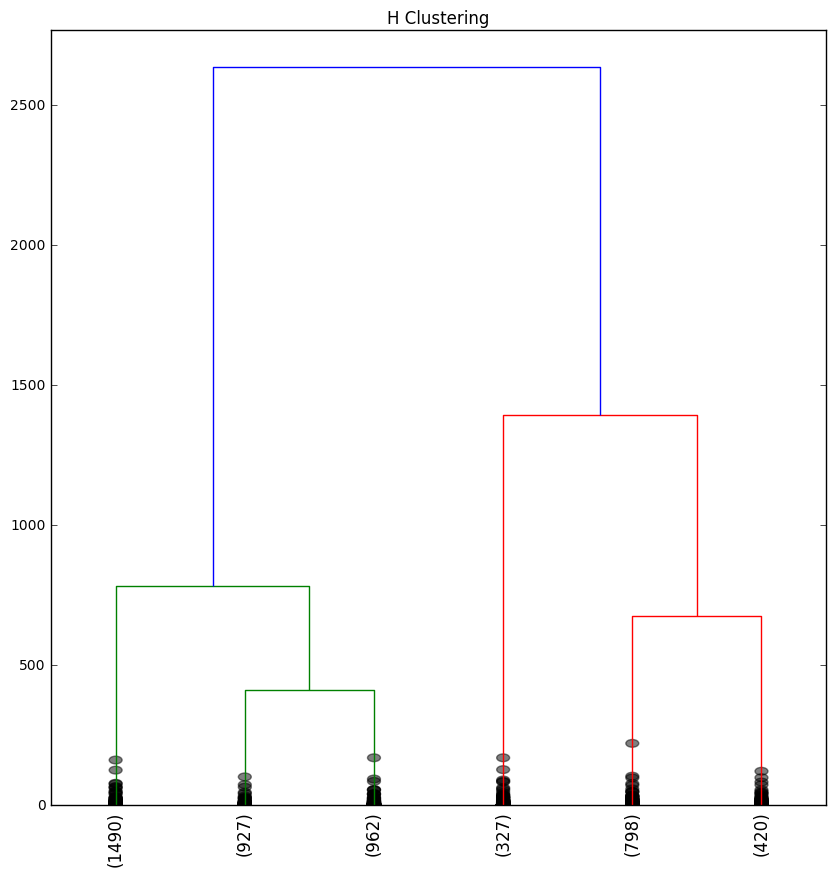

In [85]:
pyplot.figure(figsize=(10,10))
pyplot.title('H Clustering')
dendrogram(z,
    p=6,
    leaf_rotation=90.,
    truncate_mode='lastp',
    show_contracted=True
          )
pyplot.show()

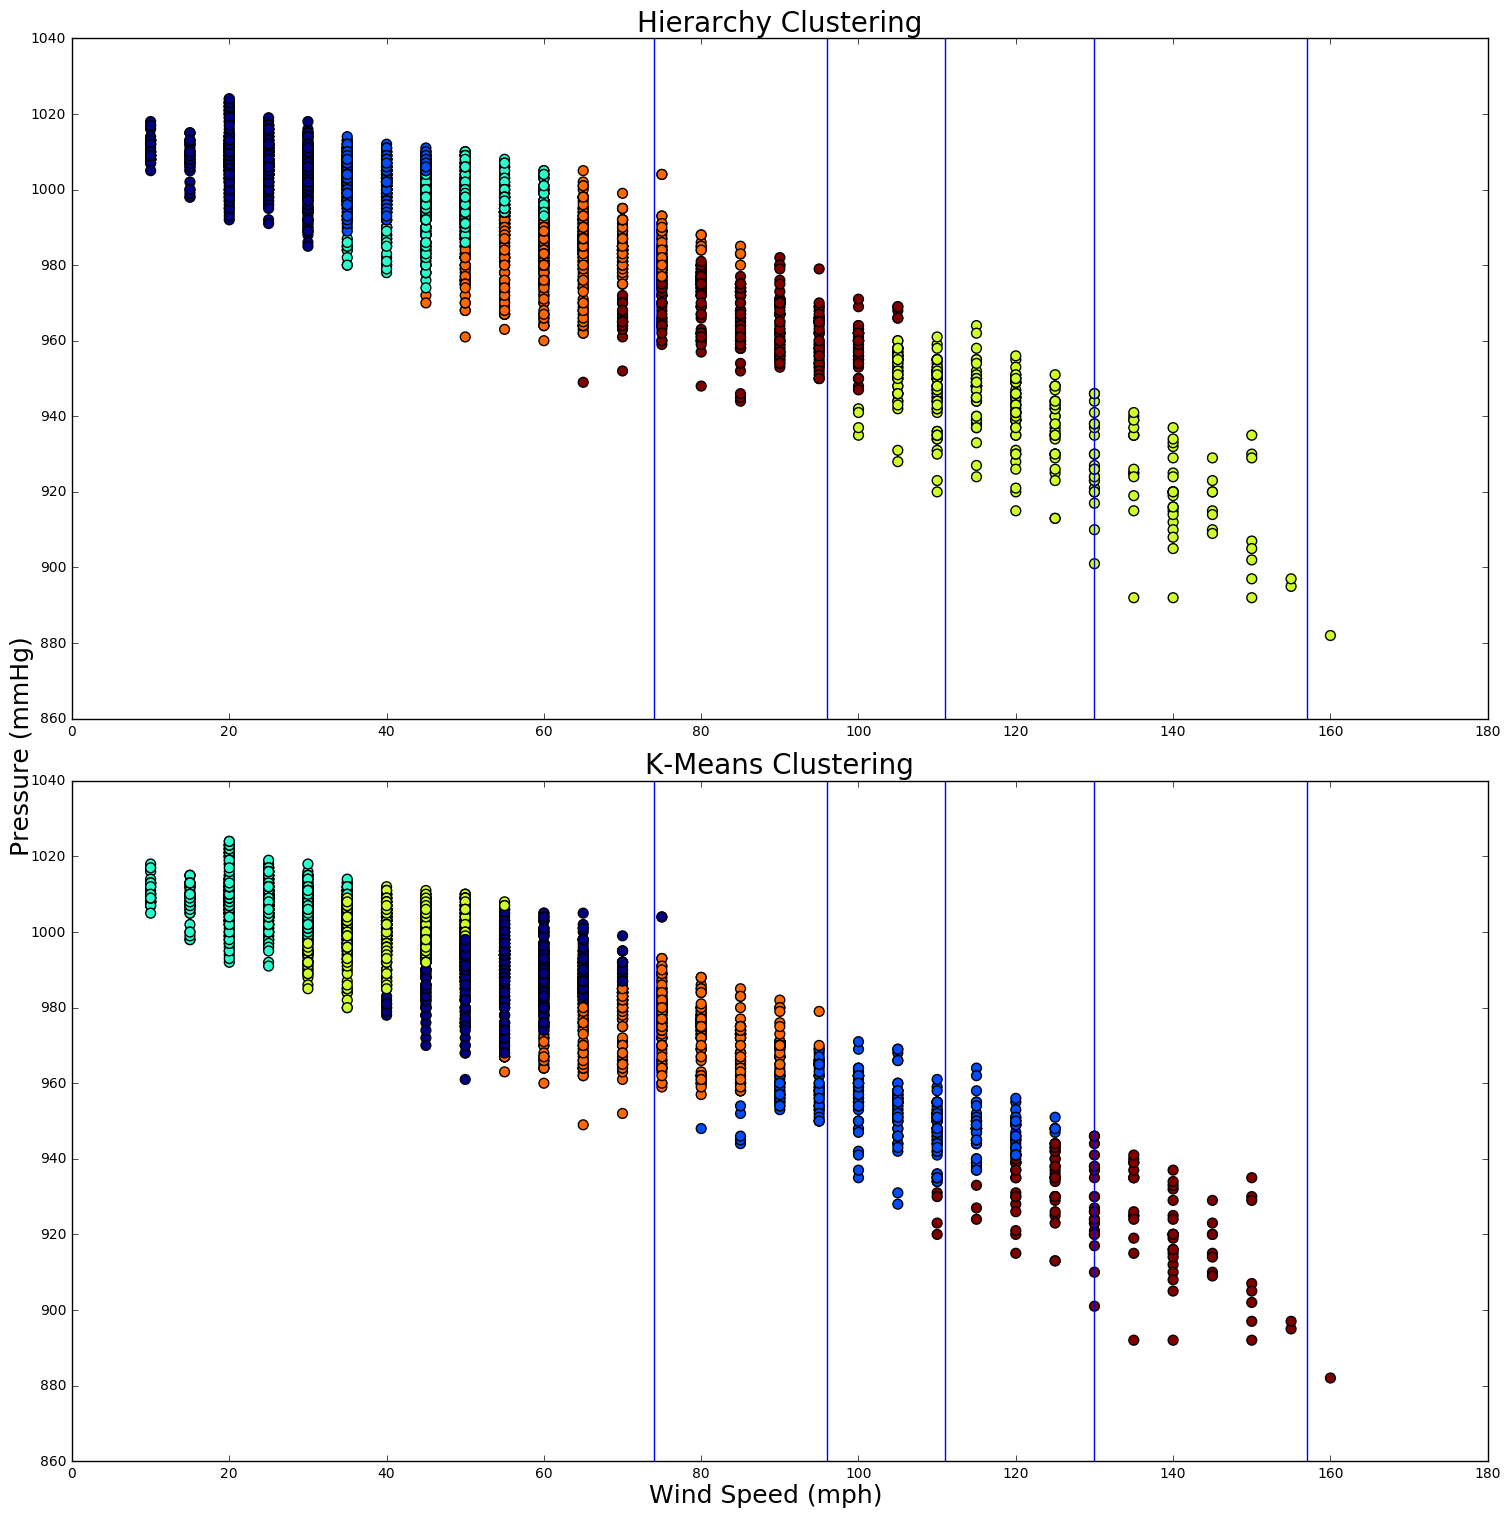

In [101]:
clusters = fcluster(z, 400, 'distance')

simpson_banana = [74, 96, 111, 130, 157]

fig, axes = pyplot.subplots(2,1, figsize=(15,15))
axes[0].scatter(p_w[:,1], p_w[:,0], c=clusters, s=50)
axes[0].set_title("Hierarchy Clustering", fontsize=20)
axes[1].scatter(p_w[:,1], p_w[:,0], c=kmean_clusters, s=50)
axes[1].set_title("K-Means Clustering", fontsize=20)

for c in simpson_banana:
    axes[0].axvline(c)
    axes[1].axvline(c)

fig.text(0.5, 0.0004, "Wind Speed (mph)", ha='center', va='center', fontsize=18)
fig.text(.004, 0.5, "Pressure (mmHg)", ha='center', va='center', rotation='vertical', fontsize=18)
pyplot.tight_layout()